# 7FNCE025W High Frequency Trading Assignment 1

by Ridwan Harir

In [34]:
# Importing all the necessary libraries

import pandas as pd # for data analystics libraries
import numpy as np # for number manipulation
import matplotlib.pyplot as plt # for plotting and visualisations
import statistics as stats # for statistcial analysis
from mat4py import loadmat # for retrieving and accessing the .mat files
import scipy.io as io # same as above and better
import seaborn as sns # for data visualisation
from sklearn.linear_model import LinearRegression # helpful for regression analysis
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### Loading the Data

In [4]:
df = io.loadmat('FB_20141126.mat') # importing the first dataset
df2 = io.loadmat('FTSE_sample') # # importing the dataset for question 2

LOB = df['LOB']  # extracting data from the Log Order Book

In [5]:
LOB_shape = df['LOB'].shape # finding the shape of the array


for header in LOB.dtype.names: # This loop will retrieve the headers and the data in the arrays
    print(header)
    print(LOB[header])

NumberMO
[[array([[0, 0],
         [1, 0],
         [1, 0],
         ...,
         [0, 0],
         [0, 3],
         [0, 3]], dtype=uint8)]]
VolumeMO
[[array([[   0,    0],
         [ 105,    0],
         [ 100,    0],
         ...,
         [   0,    0],
         [   0, 9923],
         [   0, 3837]])]]
EventTime
[[array([[34200100],
         [34200200],
         [34200300],
         ...,
         [57599800],
         [57599900],
         [57600000]])]]
BuyPrice
[[array([[754700, 754500, 754400, ..., 750400, 750300, 750200],
         [754700, 753800, 753500, ..., 740100, 740000, 738800],
         [755000, 754700, 753800, ..., 742800, 740100, 740000],
         ...,
         [776300, 776200, 776100, ..., 774600, 774500, 774300],
         [776300, 776200, 776100, ..., 774600, 774500, 774300],
         [776300, 776200, 776100, ..., 774600, 774500, 774300]])]]
SellPrice
[[array([[755000, 755100, 755300, ..., 758600, 759100, 759500],
         [755000, 755100, 755300, ..., 759800, 759900, 760

In [6]:
# the data is a nested array and the change of the tick is 1 miliseconds

tick = ((LOB['EventTime'][0][0][:,0])-3600000*9.5)*1e-3 
bid = ((LOB['BuyPrice'][0][0][:,0])*1e-4)
bidvol = (LOB['BuyVolume'][0][0][:,0]*1.0)
ask = (LOB['SellPrice'][0][0][:,0]*1e-4)
askvol = (LOB['SellVolume'][0][0][:,0]*1.0)
M0 = LOB['MO'][0][0]*1.0

# accounting for delta time

dt = tick[1] - tick[0]

# type the variable below to see the arrays or the delta time
dt



0.1

### Calculating the MidPrice, Spread, Volume Imbalance and MicroPrice

In [7]:
midprice = (bid + ask) / 2
microprice = (bid * askvol + ask * bidvol) / (bidvol + askvol)
spread = ask - bid

In [8]:
midprice_mean = midprice.mean().round(4) # findin the 
microprice_mean = microprice.mean().round(4)
avg_spread = (ask.max() - bid.min()).mean().round(4)

print(f'mid-price: {midprice_mean}')
print(f'micro-price: {microprice_mean}')
print(f'Spread: {avg_spread}')

mid-price: 77.2374
micro-price: 77.2372
Spread: 2.32


In [9]:
df1 = {
    'Bid': bid,
    'Ask': ask,
    'Bid Volume': bidvol,
    'Ask Volume': askvol,
    'Midprice': midprice,
    'Microprice': microprice,
    'Spread': spread
}

df1 = pd.DataFrame(df1)
df1

,Bid,Ask,Bid Volume,Ask Volume,Midprice,Microprice,Spread
0,75.47,75.50,1600.0,105.0,75.485,75.498152,0.03
1,75.47,75.50,1600.0,105.0,75.485,75.498152,0.03
2,75.50,75.51,500.0,100.0,75.505,75.508333,0.01
3,75.51,75.53,100.0,1000.0,75.520,75.511818,0.02
4,75.51,75.53,100.0,1000.0,75.520,75.511818,0.02
...,...,...,...,...,...,...,...
233995,77.63,77.64,5148.0,9800.0,77.635,77.633444,0.01
233996,77.63,77.64,5148.0,9800.0,77.635,77.633444,0.01
233997,77.63,77.64,5148.0,12600.0,77.635,77.632901,0.01
233998,77.63,77.64,5148.0,12600.0,77.635,77.632901,0.01


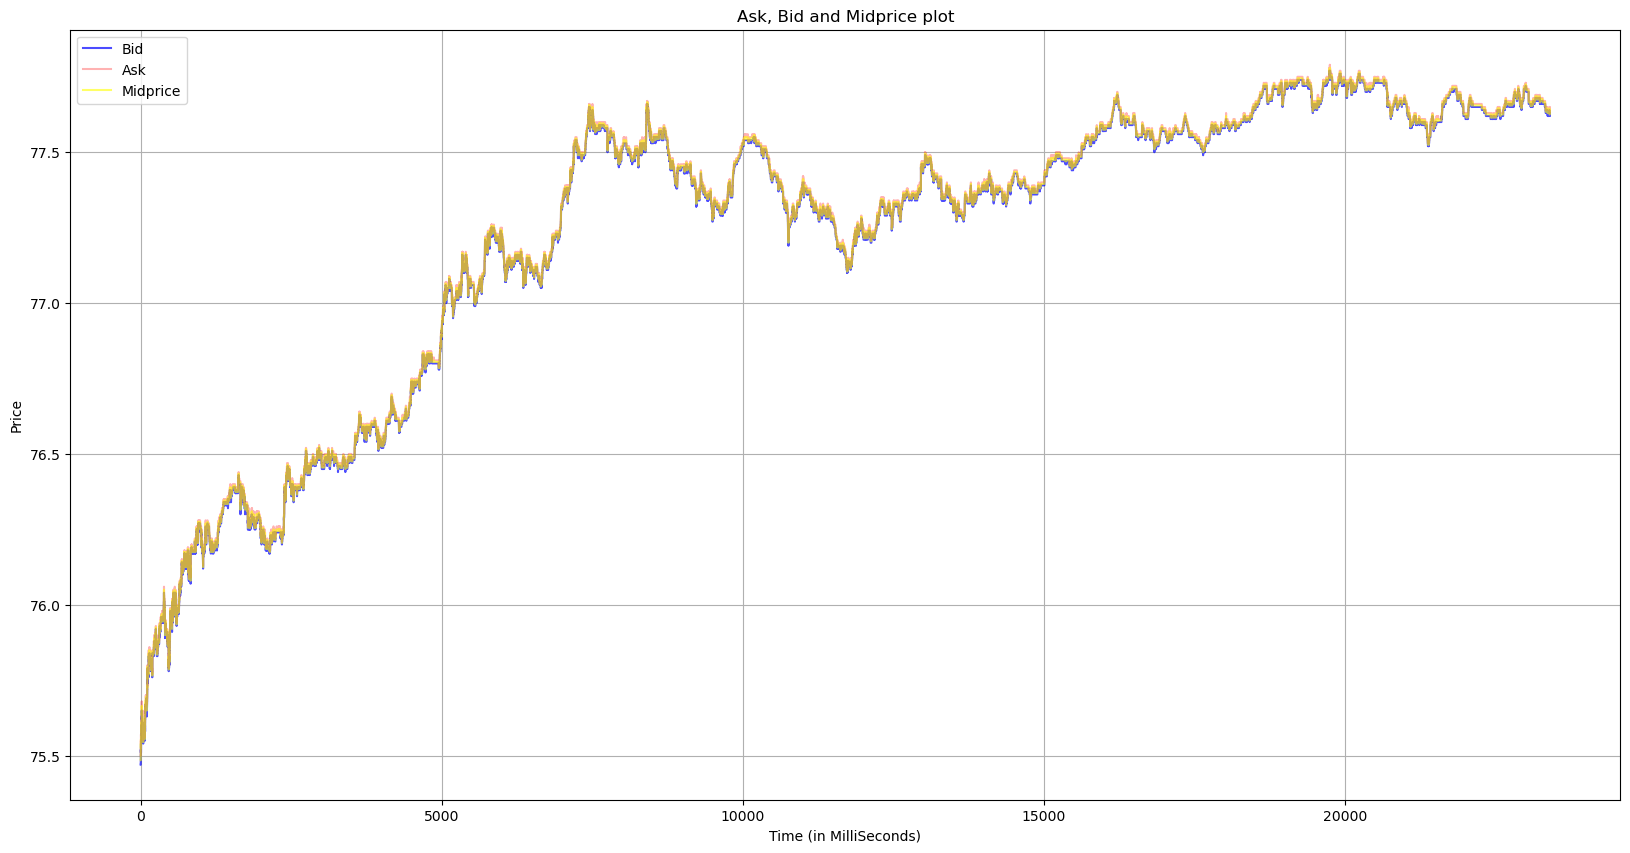

In [10]:
plt.figure(figsize=(20,10))
plt.title('Ask, Bid and Midprice plot')
plt.plot(tick,df1['Bid'],color = 'blue', alpha=0.7, label= 'Bid')
plt.plot(tick, df1['Ask'], color = 'red', alpha=0.3, label= 'Ask')
plt.plot(tick, df1['Midprice'], color = 'yellow', alpha=0.6,  label= 'Midprice')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Time (in MilliSeconds)')
plt.grid()
plt.show()

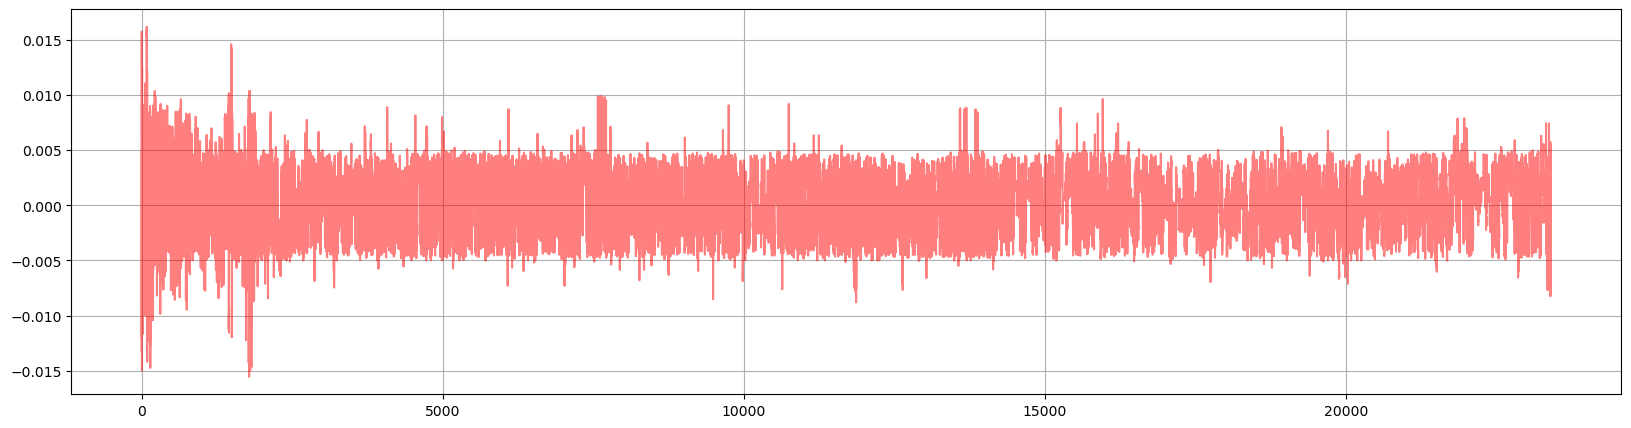

In [11]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick, midprice - microprice, color='red', alpha = 0.5)

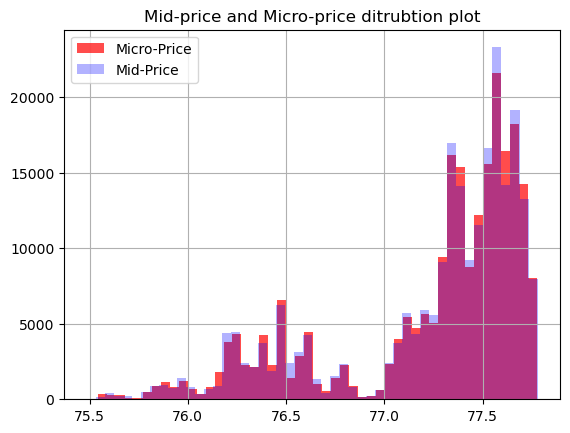

In [12]:
plt.hist(microprice, bins = 50, color='red', alpha = 0.7,label='Micro-Price')
plt.hist(midprice, bins = 50, color='blue', alpha = 0.3,label='Mid-Price')
plt.grid()
plt.title('Mid-price and Micro-price ditrubtion plot')
plt.legend()

Text(0, 0.5, 'Spread')

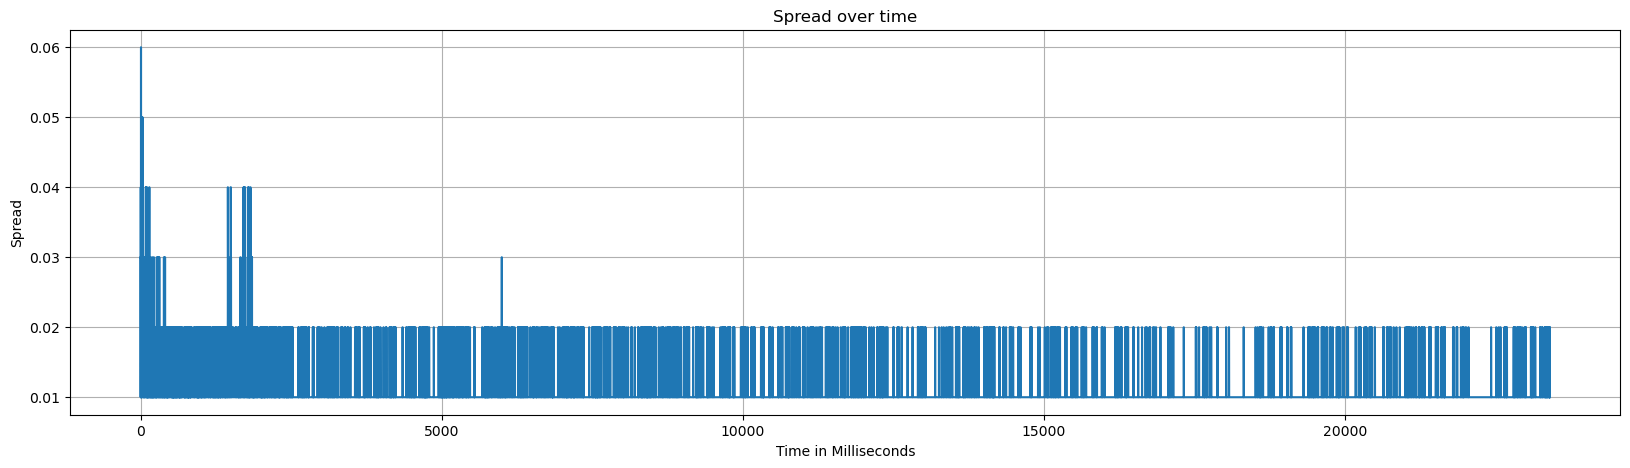

In [13]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick, spread)
plt.title('Spread over time')
plt.xlabel('Time in Milliseconds')
plt.ylabel('Spread')

Text(0, 0.5, 'Frequency')

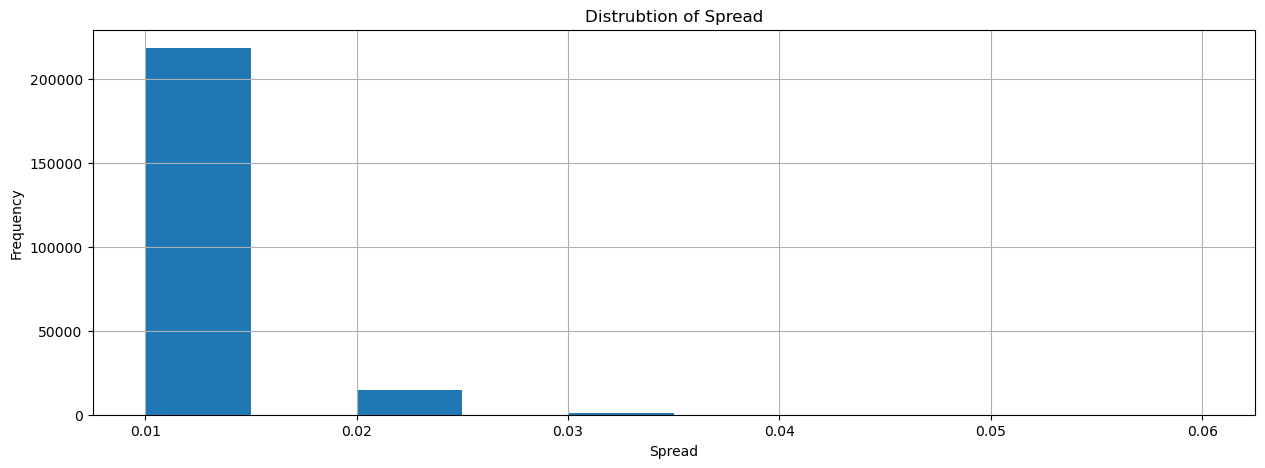

In [14]:
plt.figure(figsize=(15,5))
plt.hist(spread,bins=10)
plt.grid()
plt.title('Distrubtion of Spread')
plt.xlabel('Spread')
plt.ylabel('Frequency')

#### Volume Imbalance 

In [15]:
volume_imbalance = (bidvol - askvol) / (bidvol + askvol)


df1['rho'] = np.array(volume_imbalance, ndmin=2).T # converting volume imbalance to a column vector (transpose) or.T and storing it in the variable rho

df1['rho'] = pd.DataFrame(df1['rho'])


(0.0, 24569.995)

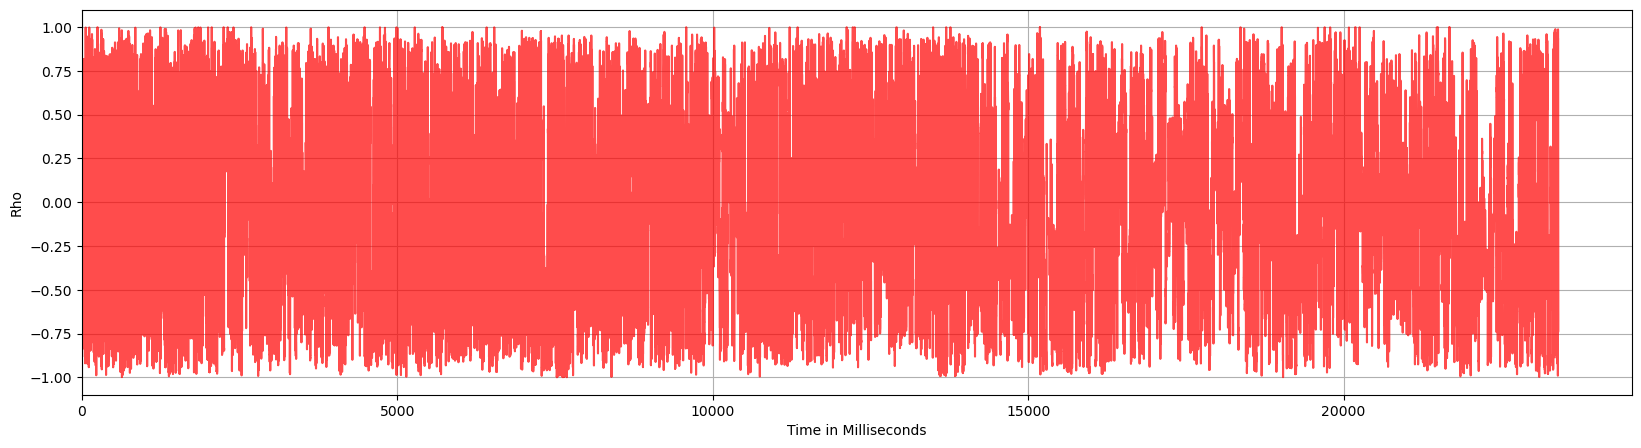

In [16]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(tick,df1['rho'], label = 'rho', alpha= 0.7, color='red')
plt.xlabel('Time in Milliseconds')
plt.ylabel('Rho')
plt.xlim(0)

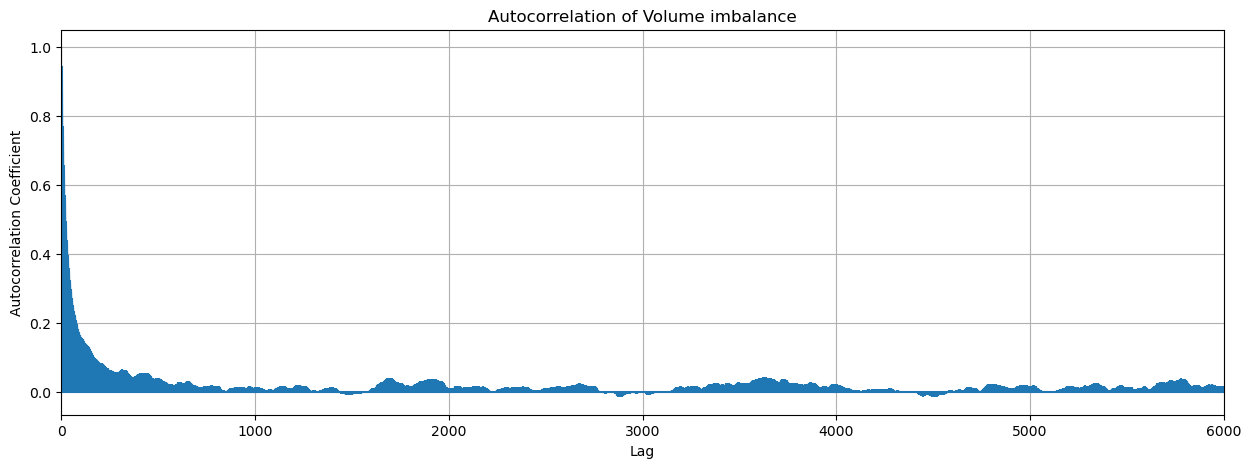

In [17]:

rho = np.array(volume_imbalance, ndmin=2).T

plt.figure(figsize=(15, 5))
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Coefficient')
plt.title('Autocorrelation of Volume imbalance')
plt.xlim([0,6000])
plt.grid()
plt.show()

Text(0, 0.5, 'Freq')

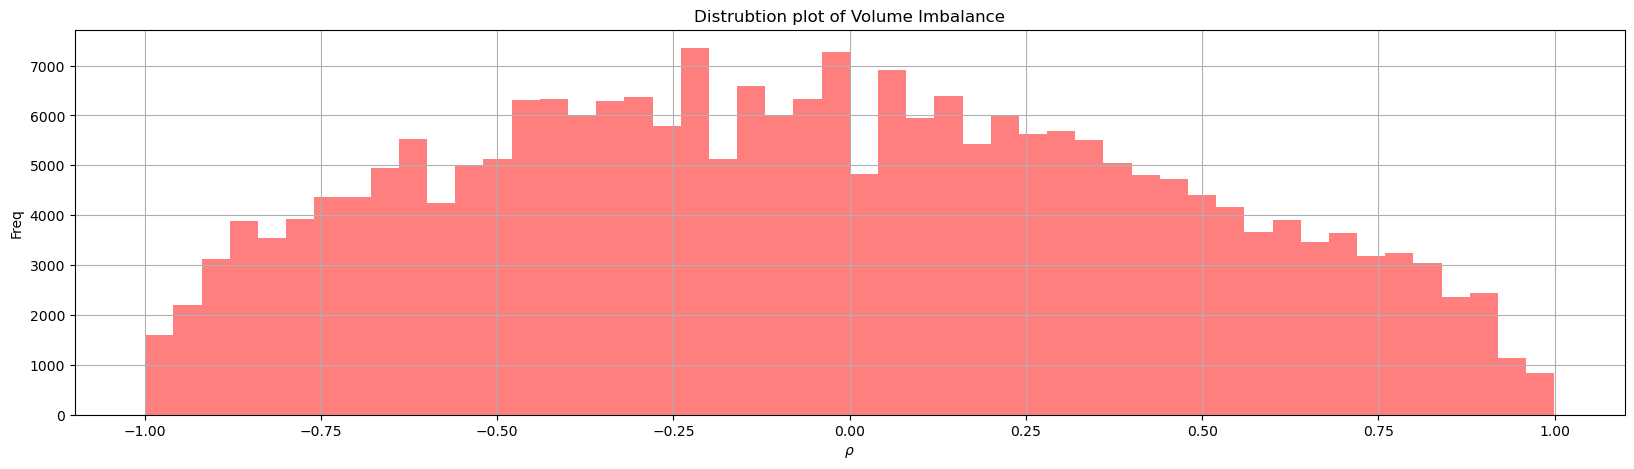

In [18]:
plt.figure(figsize=(20,5))
plt.hist(rho, bins=50, color='red', alpha = 0.5)
plt.title('Distrubtion plot of Volume Imbalance')
plt.grid()
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')

#### Volume Imbalance for Market Orders 

In [19]:
MO = pd.DataFrame(M0)


In [20]:
rho_MO = (MO[3] - MO[4]) / (MO[3] + MO[4])

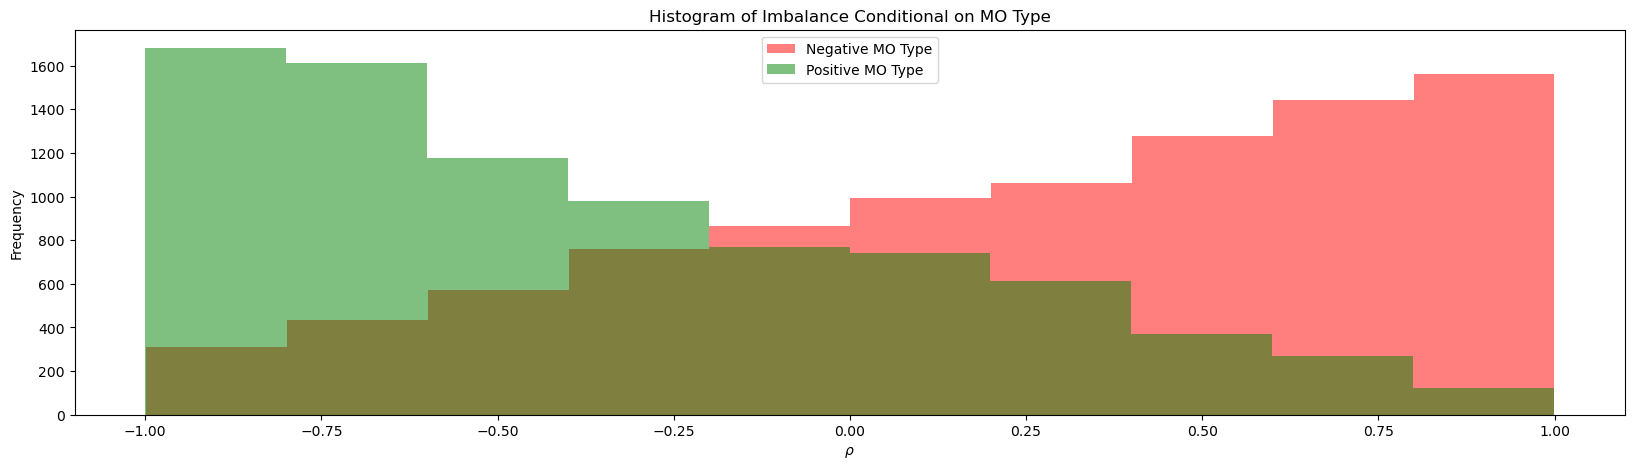

In [21]:
rho_MO_negative = rho_MO[MO.iloc[:, 7] == -1] # 
rho_MO_positive = rho_MO[MO.iloc[:, 7] == 1]

plt.figure(figsize=(20,5))
plt.hist(rho_MO_negative, bins=10, alpha=0.5,color='red', label='Negative MO Type')
plt.hist(rho_MO_positive, bins=10, alpha=0.5,color = 'green', label='Positive MO Type')

plt.title("Histogram of Imbalance Conditional on MO Type")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Q2: FTSE_sample Analysis

#### Creating a new dataframe with the new data

In [22]:
df2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Oct 15 23:13:24 2023',
 '__version__': '1.0',
 '__globals__': [],
 'Bestask': array([[149.35],
        [149.35],
        [149.5 ],
        ...,
        [126.  ],
        [125.95],
        [126.8 ]]),
 'Bestbid': array([[149.1 ],
        [149.  ],
        [149.25],
        ...,
        [125.9 ],
        [125.9 ],
        [126.7 ]]),
 'MO': array([[ 0.    ],
        [ 4.1283],
        [-2.8656],
        ...,
        [20.969 ],
        [27.293 ],
        [31.9993]])}

In [23]:
Best_Ask =df2['Bestask']
Best_Bid = df2['Bestbid']
MO1 = df2['MO']

In [24]:
df2 = {
    'Best Ask': Best_Ask.flatten(),
    'Best Bid': Best_Bid.flatten(),
    'MO': MO1.flatten()
}

df2 = pd.DataFrame(df2)

In [25]:
df2

,Best Ask,Best Bid,MO
0,149.35,149.10,0.0000
1,149.35,149.00,4.1283
2,149.50,149.25,-2.8656
3,149.95,149.85,5.4553
4,149.90,149.60,122.4072
...,...,...,...
62215,125.85,125.75,-43.7396
62216,125.95,125.85,2.1216
62217,126.00,125.90,20.9690
62218,125.95,125.90,27.2930


#### Mid-Price and Minutely Returns

In [26]:
df2['Mid-Price'] = (df2['Best Ask'] + df2['Best Bid']) / 2 # Mid Price for the dataset

df2['Minutely Returns'] = (df2['Mid-Price'].pct_change() * 100).fillna(0)  # Minutely Returns calculations

summary_stats = df2['Minutely Returns'].describe() 

print(f'Summary stats for Minutely Returns: ')
print(summary_stats)



Summary stats for Minutely Returns: 
count    62220.000000
mean        -0.000095
std          0.182502
min         -7.428571
25%         -0.058754
50%          0.000000
75%          0.058052
max          5.734521
Name: Minutely Returns, dtype: float64


#### Autocorrelation of Order Flows:

In [27]:
order_flow = df2['MO'] -df2['MO'].shift(1) # creating the order flow variable 

In [28]:
autocorr_values = []
lags = range(21) 
for lag in lags:
    autocorr_values.append(order_flow.autocorr(lag))

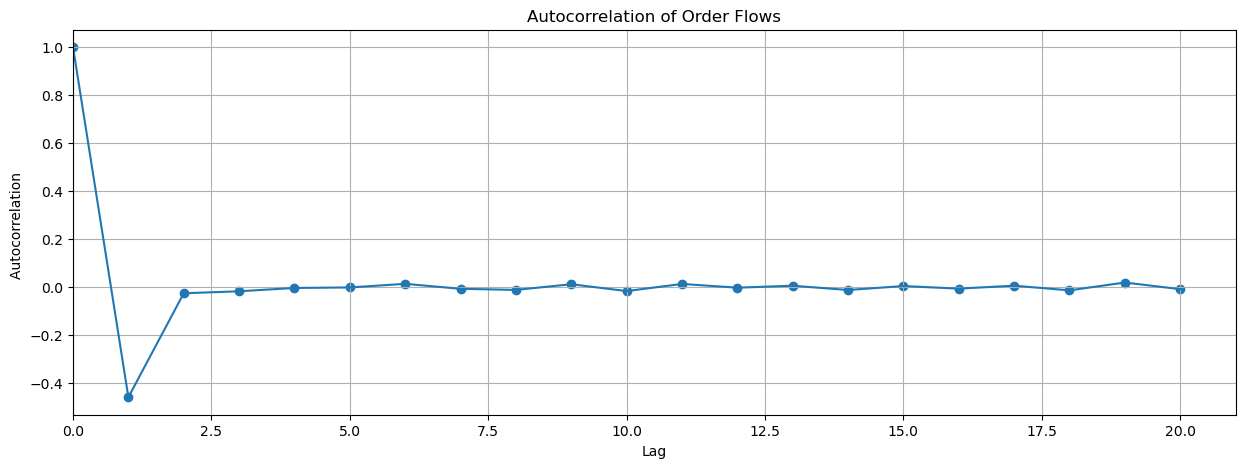

In [29]:
plt.figure(figsize=(15, 5))
plt.scatter(lags, autocorr_values)
plt.plot(lags, autocorr_values) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation ')
plt.title('Autocorrelation of Order Flows')
plt.xlim(0)
plt.grid()
plt.show()

#### Regression Analysis on Minutely Return

In [30]:
df2['Previous Minute Return'] = df2['Minutely Returns'].shift(1).fillna(0) # previous minute return added  to df

In [31]:
df2 = df2.dropna(subset=['Previous Minute Return', 'MO', 'Minutely Returns'])

In [32]:
X = df2[['Previous Minute Return', 'MO']]
y = df2['Minutely Returns']


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print(f'Coefficients: {model.coef_.round(4)}')
print(f'Intercept: {model.intercept_.round(4)}')
print(f'Mean Squared Error: {mse.round(4)}')

Coefficients: [-0.0393  0.0024]
Intercept: 0.0003
Mean Squared Error: 0.0292


In [38]:

y = df2['Minutely Returns']  # dependent variable.
X = df2[['Previous Minute Return','MO']]  #  independent variable.


X = sm.add_constant(X)
model = sm.OLS(y, X) # creating the OLS model.

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Minutely Returns   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4360.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:52:16   Log-Likelihood:                 21630.
No. Observations:               62220   AIC:                        -4.325e+04
Df Residuals:                   62217   BIC:                        -4.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### Trading Strategy Development

Calculate the cumulative order flows for the previous 30 minutes.

In [ ]:
df2['Cumulative_Order_Flows'] = df2['MO'].rolling(window=30).sum()  

Trading strategy

In [ ]:
#point of entry and exit

# negative and positive signals are grouped into bins derived from the cumulative order flows 
df2['Trading_Strategy'] = pd.cut(df2['Cumulative_Order_Flows'], bins=[-float('inf'), 0, float('inf')], labels=[-1, 1]) 
df2['Trading_Strategy'] = pd.to_numeric(df2['Trading_Strategy'], errors='coerce').fillna(0)

# calculating the returns of the strategy
df2['Strategy_Return'] = df2['Trading_Strategy'] * df2['Minutely Returns']

# calculating the cumulative returns of the trading strategy
cumulative_return = df2['Strategy_Return'].cumsum()
print("Cumulative Return of the Trading Strategy:")
print(cumulative_return)



Cumulative Return of the Trading Strategy:
0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
62215    328.911250
62216    328.831759
62217    328.792045
62218    328.811894
62219    328.156742
Name: Strategy_Return, Length: 62220, dtype: float64


Comparing stock returns 

In [ ]:
df2['Stock_Cumulative_Return'] = df2['Minutely Returns'].cumsum()

cumulative_return_strategy = df2['Strategy_Return'].cumsum()

print("Cumulative Return of the Stock during the Whole Period:")
print(df2['Stock_Cumulative_Return'].iloc[-1])  # Print the last value

print("\nCumulative Return of the Trading Strategy:")
print(cumulative_return_strategy.iloc[-1])  # Print the last value



Cumulative Return of the Stock during the Whole Period:
-5.938215643075335

Cumulative Return of the Trading Strategy:
328.156741823321


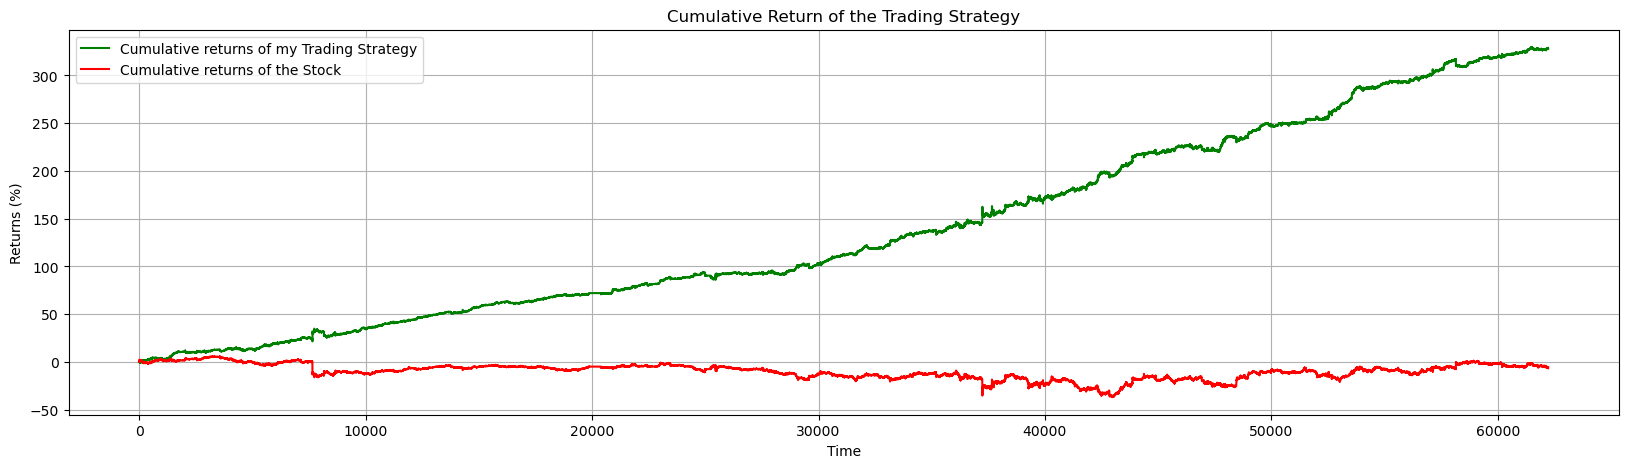

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(cumulative_return, color='green', label='Cumulative returns of my Trading Strategy')
plt.plot(df2['Stock_Cumulative_Return'], color='red', label='Cumulative returns of the Stock')
plt.title('Cumulative Return of the Trading Strategy')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.grid()
plt.legend()
plt.show()

#### Goodbye!